# QISKit example: QFT adder
Based on Draper adder (https://arxiv.org/pdf/quant-ph/0008033.pdf)

* Gines Carrascal, Complutense University of Madrid

https://github.com/gines-carrascal/jupyter-qiskit

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer
from math import pi

import qiskit.tools.jupyter


In [2]:
sumando_1 = input("Primer sumando en binario (4 bits)")
sumando_2 = input("Segundo sumando en binario(4 bits)")

Primer sumando en binario (4 bits)1111
Segundo sumando en binario(4 bits)0001


In [5]:
n = 4

n+=1

a = QuantumRegister(n,"a")
b = QuantumRegister(n, "b")
resultado = ClassicalRegister(n, "result")

qc = QuantumCircuit(a,b,resultado)

for i in range(1,n):
    if sumando_1[i-1] == "1":
        qc.x(a[n - (i+1)])
for i in range(1,n):
    if sumando_2[i-1] == "1":
        qc.x(b[n - (i+1)])
        
# Take the QFT.
# Iterate through the target.
for i in range(n,0,-1):
    # Apply the Hadamard gate to the target.
    qc.h(b[i-1])

    # Iterate through the control.
    for j in range(i-1,0,-1):
        qc.cu1(2*pi/2**(i-j+1), b[j-1], b[i-1])
        
# Compute controlled-phases.
# Iterate through the targets.
for i in range(n,0,-1):
    # Iterate through the controls.
    for j in range(i,0,-1):
        qc.cu1(2*pi/2**(i-j+1), a[j-1], b[i-1])

# Take the inverse QFT.
# Iterate through the target.
for i in range(1,n+1):
    # Iterate through the control.
    for j in range(1,i):
        # The inverse Fourier transform just uses a negative phase.
        qc.cu1(-2*pi/2**(i-j+1), b[j-1], b[i-1])

    # Apply the Hadamard gate to the target.
    qc.h(b[i-1])

# Measure
qc.measure(b,resultado)    

In [6]:
%circuit_library_info qc

Adding barriers for easiest understanding:

In [7]:
n = 4

n+=1


a = QuantumRegister(n,"a")
b = QuantumRegister(n, "b")
resultado = ClassicalRegister(n, "result")

qc = QuantumCircuit(a,b,resultado)

for i in range(1,n):
    if sumando_1[i-1] == "1":
        qc.x(a[n - (i+1)])
for i in range(1,n):
    if sumando_2[i-1] == "1":
        qc.x(b[n - (i+1)])
qc.barrier(a,b)

# Take the QFT.
# Iterate through the target.
for i in range(n,0,-1):
    # Apply the Hadamard gate to the target.
    qc.h(b[i-1])

    # Iterate through the control.
    for j in range(i-1,0,-1):
        qc.cu1(2*pi/2**(i-j+1), b[j-1], b[i-1])
        
qc.barrier(a,b)
# Compute controlled-phases.
# Iterate through the targets.
for i in range(n,0,-1):
    # Iterate through the controls.
    for j in range(i,0,-1):
        qc.cu1(2*pi/2**(i-j+1), a[j-1], b[i-1])

qc.barrier(a,b)
# Take the inverse QFT.
# Iterate through the target.
for i in range(1,n+1):
    # Iterate through the control.
    for j in range(1,i):
        # The inverse Fourier transform just uses a negative phase.
        qc.cu1(-2*pi/2**(i-j+1), b[j-1], b[i-1])

    # Apply the Hadamard gate to the target.
    qc.h(b[i-1])

qc.barrier(a,b)

# Measure
qc.measure(b,resultado)    

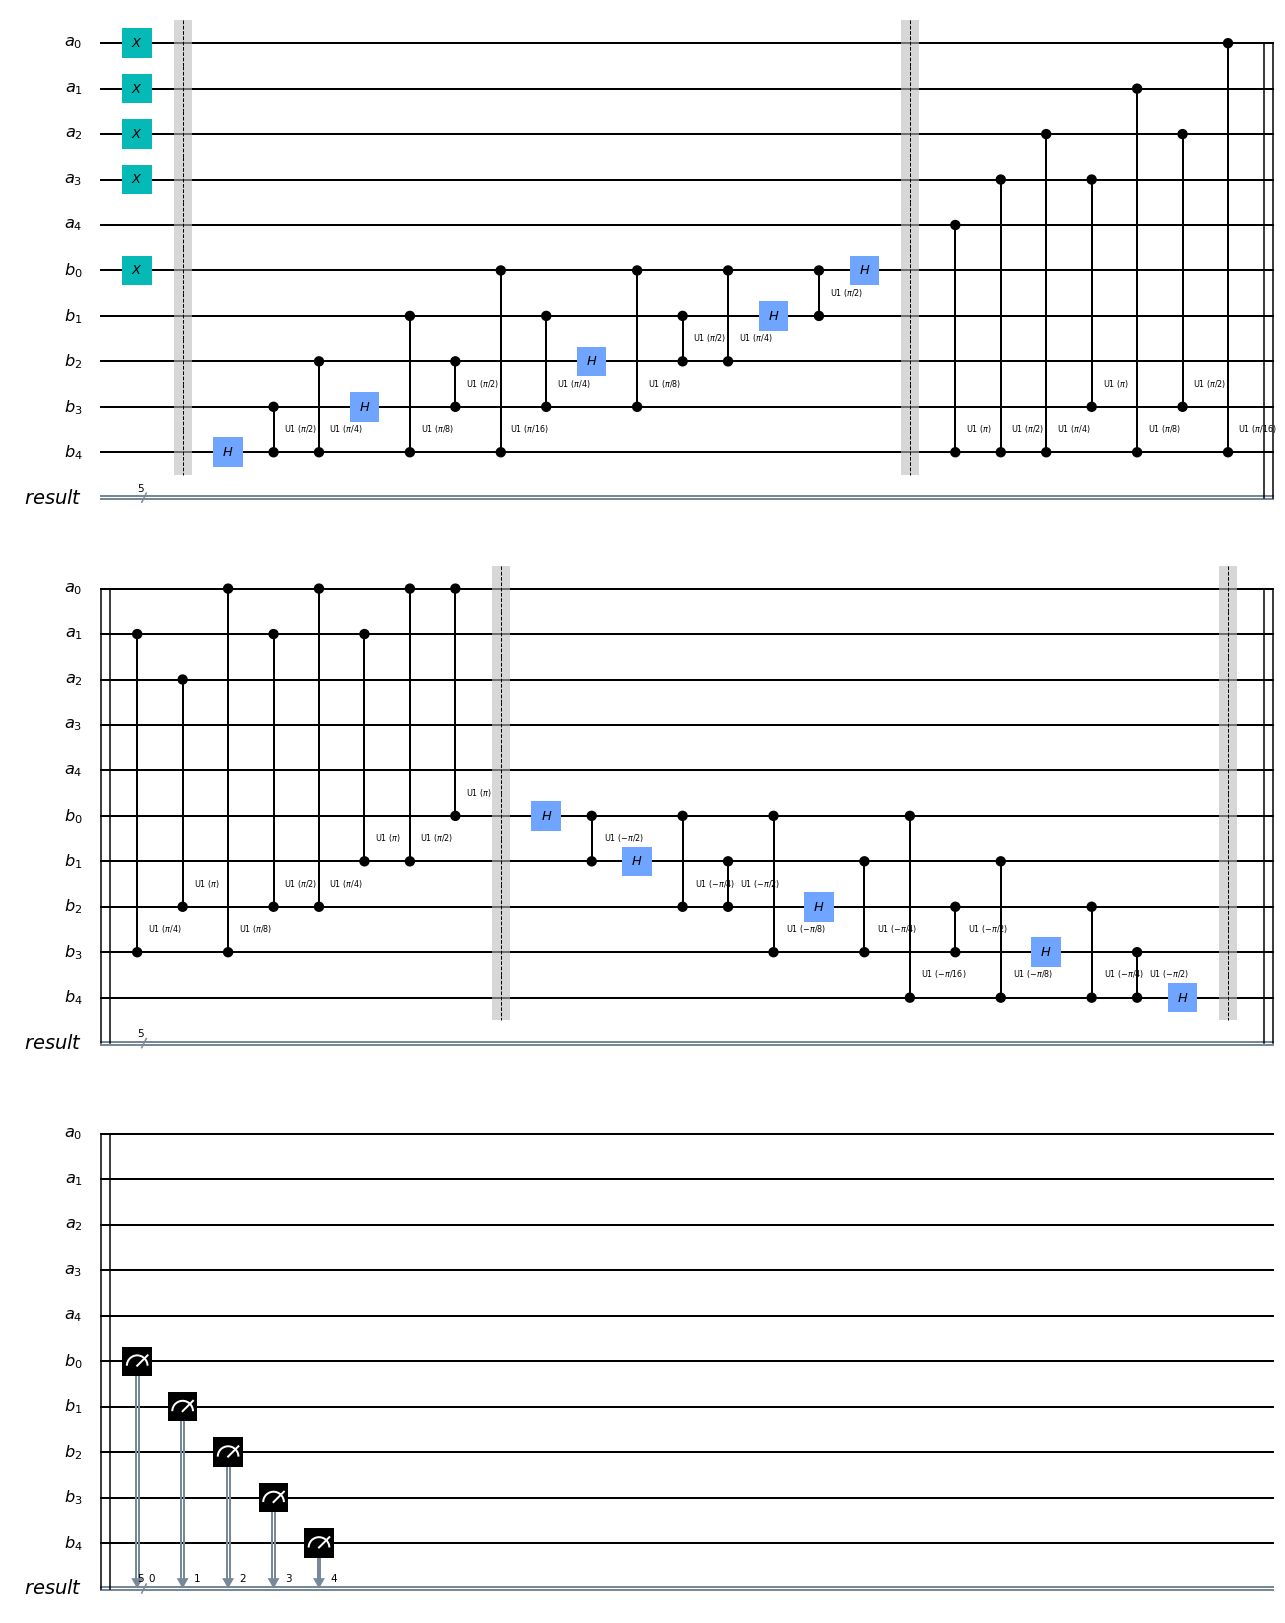

In [8]:
qc.draw(output='mpl')

In [9]:
my_backend = Aer.get_backend("qasm_simulator")  
job = execute(qc, my_backend, shots=20)
job_stats = job.result().get_counts()
print(job_stats) 

{'10000': 20}


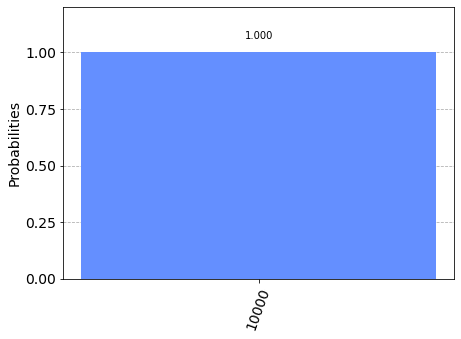

In [10]:
from qiskit.visualization import plot_histogram


# Run in interactive mode
plot_histogram(job_stats)

In [11]:
%qiskit_version_table